# Finite Difference Method for Beam Modelling

Mesh size is key here. Because you are dealing with two different dimensions (r and z) affecting eachother you need to make sure the ratio between the integrals is correct. If dz is too big, the step size will not give the opportuinity for divergence to occur in the radial direction. 

dz/k*dr**2 <<1  --> k*dr**2 >> dz --> k*dr**2 =10*dz --> dz = k*dr**2/100 

1.4862153526045923
2.9724307052091845
4.458646057813778
5.944861410418369
7.431076763022962
8.917292115627555
10.403507468232148
11.889722820836738
13.375938173441332
14.862153526045924
16.348368878650515
17.83458423125511
19.320799583859703
20.807014936464295
22.293230289068884
23.779445641673476
25.265660994278072
26.751876346882664
28.238091699487256
29.72430705209185
31.21052240469644
32.69673775730103
34.182953109905625
35.66916846251022
37.15538381511481
38.641599167719406
40.127814520323994
41.61402987292859
43.10024522553318
44.58646057813777
46.07267593074236
47.55889128334695
49.045106635951555
50.531321988556144
52.01753734116073
53.50375269376533
54.98996804636992
56.47618339897451
57.9623987515791
59.4486141041837
60.934829456788286
62.42104480939288
63.90726016199747
65.39347551460206
66.87969086720665
68.36590621981125
69.85212157241585
71.33833692502044
72.82455227762503
74.31076763022962
75.79698298283421
77.28319833543881
78.7694136880434
80.25562904064799
81.74184439

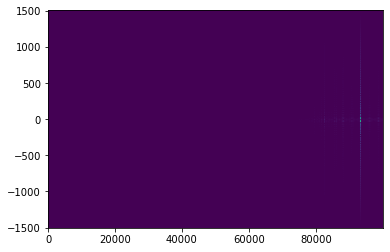

In [24]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 75E3
lmda = 1.064
w = 1E3
k = 2*m.pi/lmda
rpoints = 300
r = np.linspace(0,1.5*w,rpoints)
dr = r[2]-r[1]
dz = k*(dr**2)/10
zrange = 100E3 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edata = np.zeros((rpoints,zpoints),dtype=complex)
Change_data = np.zeros((rpoints,zpoints),dtype=complex)

a = 2/(k*(w**2)) + 1j/F

for i in range(rpoints):
    Edata[i,0] = m.exp(-a*(r[i]**2)*k/2)

integral = sum(Edata[:,0])

for j in range(1,zpoints):
    for i in range(rpoints):
        if 0<i<rpoints-1:
            Fd = ((Edata[i+1,j-1]-Edata[i,j-1])/(dr))/r[i]
            Sd = ((Edata[i+1,j-1]-2*Edata[i,j-1]+Edata[i-1,j-1])/(dr**2))
            Edata[i,j]=Edata[i,j-1]+ ((((1j/2/k)*(Sd+Fd))*dz))
    
        
    Edata[rpoints-1,j] = Edata[rpoints-2,j]        
    Edata[0,j] = Edata[1,j]
    totalarea = sum(Edata[:,j])
    for i in range(rpoints):
        Edata[i,j] = (Edata[i,j]/totalarea)*integral

    pdone = (j/zpoints)*100
    if j%1000 == 0:
        print(pdone)
    
Edata = np.vstack((np.flipud(Edata),Edata))

plotr = np.hstack((np.flip(r*-1),r))
plt.pcolormesh(z,plotr,abs(Edata),shading='auto')



(-10.0, 10.0)

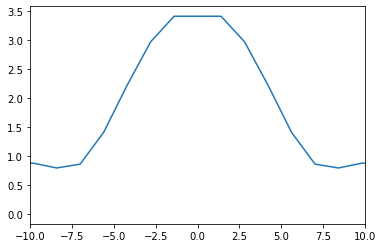

In [19]:
plt.plot(plotr,abs(Edata[:,((zpoints)-1)]))
plt.xlim([-10,10])        
    

(-50.0, 50.0)

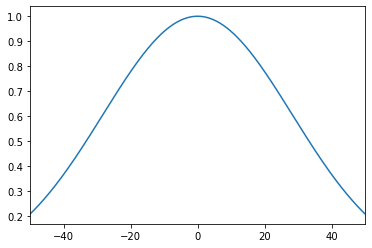

In [252]:
plt.plot(plotr,abs(Edata[:,0]))
plt.xlim([-50,50])


In [1]:

for i in range(rpoints):
    Edata[i,0] = Amp*m.exp(-a*(r[i]**2)*k/2)
Gaus_explr_1d = np.gradient(Edata[:,0])
Gaus_explr_2d = np.gradient(np.gradient(Edata[:,0]))


plt.plot(r,abs(Edata[:,0]),r,abs(Gaus_explr_1d),r,abs(Gaus_explr_2d))

NameError: name 'rpoints' is not defined

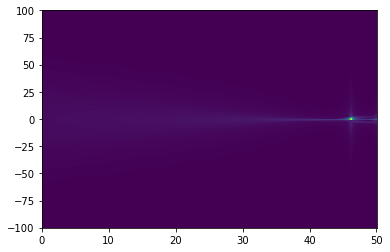

In [7]:

for j in range(zpoints):
    for i in range(rpoints): 
        if abs(Edata[i,j])>3:
            Edata[i,j]=1.5

plt.pcolormesh(z,plotr,abs(Edata),shading='auto')   

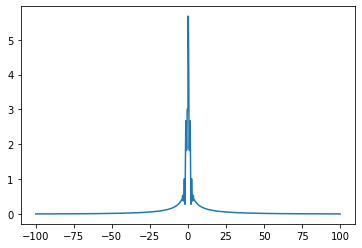

In [9]:
plt.plot(plotr,abs(Edata[:,60000]))

5.34159500026708
10.68319000053416
16.024785000801238
21.36638000106832
26.7079750013354
32.049570001602476
37.39116500186956
42.73276000213664
48.07435500240372
53.4159500026708
58.757545002937874
64.09914000320495
69.44073500347203
74.78233000373912
80.1239250040062
85.46552000427327
90.80711500454035
96.14871000480744


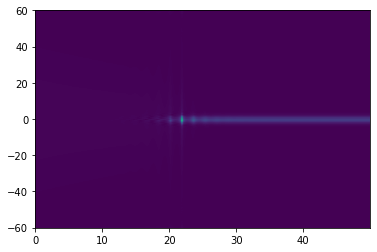

In [6]:

import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 40
lmda = 1.064
w = 40
k = 2*m.pi/lmda
rpoints = 400
r = np.linspace(0,60,rpoints)
dr = r[2]-r[1]
dz = k*(dr**2)/50
zrange = 50 #microns
zpoints = int(zrange/dz)
z = np.linspace(0,dz*zpoints,zpoints)

Edata = np.zeros((rpoints,zpoints),dtype=complex)
Change_data = np.zeros((rpoints,zpoints),dtype=complex)

a = 2/(k*(w**2)) + 1j/F


Edata[:,0] = np.exp(-a*(r[:]**2)*k/2)



integral = sum(Edata[:,0])

for j in range(1,zpoints):
    Fd=np.gradient(Edata[1:(rpoints-1),j-1],dr)
    Sd=np.gradient(Fd,dr)
    Edata[1:(rpoints-1),j] = Edata[1:(rpoints-1),j-1] + ((1j/2/k)*(Sd+(Fd/r[1:(rpoints-1)]))*dz)
    Edata[rpoints-1,j] = Edata[rpoints-2,j]        
    Edata[0,j] = Edata[1,j]
    totalarea = sum(Edata[:,j])
    Edata[:,j] = (Edata[:,j]/totalarea)*integral

    pdone = (j/zpoints)*100
    if j%1000 == 0:
        print(pdone)
    
Edata = np.vstack((np.flipud(Edata),Edata))

plotr = np.hstack((np.flip(r*-1),r))
plt.pcolormesh(z,plotr,abs(Edata),shading='auto')



In [5]:
ppg=3121/38
print(ppg*13)

1067.7105263157896


In [5]:
import numpy as np
a=np.array([1,2,3])
b=np.array([4,5,6])
c=a*b
print(c)

[ 4 10 18]
